# Ibraheem Al-Yousef
# PHYS373 Lab04

# Definitions for Q1

In [14]:
import numpy as np
import matplotlib.pyplot as plt
def my_bisection(f, a, b, tol):
    n=0
    h=a
    d=b
    s=True
    while s:
        if np.sign(f(a)) == np.sign(f(b)):
            print("The scalars a and b do not bound a root")
            break
        m = (a + b)/2
        c=(a + b)/2
        if np.sign(f(a)) == np.sign(f(m)):
            n+=1
            a = m
        elif np.sign(f(b)) == np.sign(f(m)):
            n+=1
            b = m
        s = not np.abs(f(m)) < tol
    fig = plt.figure()
    x = np.linspace(-10, 10, 100000)
    y = f(x)

    ax = fig.add_subplot(111)
    ax.set_title('The bisection method')
    ax.plot(x, y,'k', label = 'The function')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.plot([m], 0, marker="o", markersize=7, markeredgecolor="r", markerfacecolor="k",label="The zero")
    ax.set_ylim((-20,20))
    ax.legend()
    # remove the ticks from the top and right edges
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    print("The zero is %.13f after %i iterations. With error less than %.13f" %(m, n, tol))


# Q1

### Part a):

In [17]:
def newton(x0, tol):
    n=0
    print('x_k    f(x_k)    f"'"(x_k)   f(x_k)/f"'"(x_k)')
    while True:
        n+=1
        x1 = x0 - f(x0)/derivative(x0)
        print('%.13f    %.13f    %.13f   %.13f'%(x0, f(x0),derivative(x0),f(x0)/derivative(x0)))
        if abs(x1-x0) < tol:
            return print('After %i iterations, the solution is %.13f'%(n,x1))
        x0 = x1
        
def f(x):
    return x-np.cos(x)
def derivative(x):
    return 1+np.sin(x)
x0 = 0.8
tol = 10**-13
newton(x0, tol)

x_k    f(x_k)    f"(x_k)   f(x_k)/f"(x_k)
0.8000000000000    0.1032932906528    1.7173560908995   0.0601466936299
0.7398533063701    0.0012858418450    1.6741795757401   0.0007680429648
0.7390852634052    0.0000002178877    1.6736121254048   0.0000001301901
0.7390851332152    0.0000000000000    1.6736120291832   0.0000000000000
After 4 iterations, the solution is 0.7390851332152


### Part c):

In [57]:
def f(x):
    return x-np.cos(x)
def derivative(x):
    return 1+np.sin(x)
x0 = 0.8
tol = 10**-13
def secant(x0,x1, tol):
    print('    x_(i+1)           f(x_(i+1))   f(x_(i))*(x_i-x_(i-1))/(f(x_i)-f(x_(i-1)))')
    n=0
    while True:
        n+=1
        x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        print('%.13f    %.13f    %.13f'%(x2, f(x2),f(x1)*(x1-x0)/(f(x1)-f(x0))))
        if abs(x2-x1) < tol:
            return print('After %i iterations, the solution is %.13f'%(n,x1))
        x1 = x2
secant(0.6,x0,tol)

    x_(i+1)           f(x_(i+1))   f(x_(i))*(x_i-x_(i-1))/(f(x_i)-f(x_(i-1)))
0.7371368197353    -0.0032593172906    0.0628631802647
0.7391495172295    0.0001077553928    -0.0020126974942
0.7390830077959    -0.0000035571256    0.0000665094337
0.7390852033811    0.0000001174305    -0.0000021955852
0.7390851308988    -0.0000000038767    0.0000000724823
0.7390851332916    0.0000000001280    -0.0000000023928
0.7390851332126    -0.0000000000042    0.0000000000790
0.7390851332152    0.0000000000001    -0.0000000000026
0.7390851332152    -0.0000000000000    0.0000000000001
After 9 iterations, the solution is 0.7390851332152


### Part b):

The zero is 0.7390851332151 after 37 iterations. With error less than 0.0000000000001


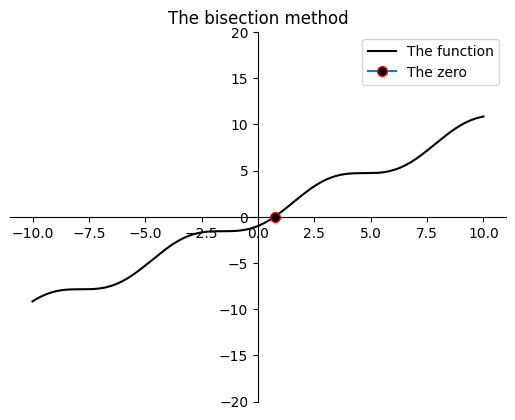

In [16]:
a= 0.6
b= 0.8
tol=10**-13
my_bisection(lambda x: x-np.cos(x),a,b ,tol )

## Newton method is the most efficient method, it took 4 iterations, however it requires us to know the derivative of the function. Next one is the secant method, which took 9 iterations, which is a dicretation of the derivative, but it requires two points initially. Finally, the bisection takes the highest number of iterations, 37!, which is the poorer.

|   **Method**  	| **Number of iterations** 	| **Efficiency with $10^{-13}$ accuracy** 	|
|:-------------:	|:------------------------:	|:-------------:	|
|   Newton  	|             4            	|      Best     	|
|   Secant 	|             9            	|      Good     	|
| Bisection 	|            37            	|      Poor     	|

# Q2

### Part a):

x_k        f(x_k)     f"(x_k)  f(x_k)/f"(x_k)
2.00000    0.80676    5.39717   0.14948
1.85052    0.08825    4.24867   0.02077
1.82975    0.00151    4.10403   0.00037
1.82938    0.00000    4.10150   0.00000
After 4 iterations, the solution is 1.82938


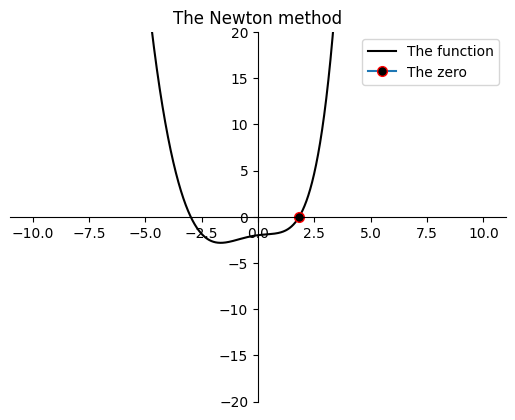

In [52]:
def newton1(x0, tol,f,ff):
    n=0
    print('x_k        f(x_k)     f"'"(x_k)  f(x_k)/f"'"(x_k)')
    while True:
        n+=1
        x1 = x0 - f(x0)/ff(x0)
        print('%.5f    %.5f    %.5f   %.5f'%(x0, f(x0),ff(x0),f(x0)/ff(x0)))
        if abs(x1-x0) < tol:
            break
        x0 = x1
    print('After %i iterations, the solution is %.5f'%(n,x1))
    x = np.linspace(-10, 10, 100000)
    y = f(x)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('The Newton method')
    ax.plot(x, y,'k', label = 'The function')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.plot([x1], 0, marker="o", markersize=7, markeredgecolor="r", markerfacecolor="k",label="The zero")
    ax.set_ylim((-20,20))
    ax.legend()
    # remove the ticks from the top and right edges
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
x0 = 2
tol = 10**-5
newton1(x0, tol,lambda x:np.exp(x)+2**(-x)+2*np.cos(x)-6, lambda x: np.exp(x)-np.log(2)*2**(-x)-2*np.sin(x))

### Part b):

x_k        f(x_k)     f"(x_k)   f(x_k)/f"(x_k)
1.50000    0.18444    1.52057   0.12129
1.37871    -0.04185    2.27085   -0.01843
1.39714    -0.00130    2.13125   -0.00061
1.39775    -0.00000    2.12681   -0.00000
After 4 iterations, the solution is 1.39775


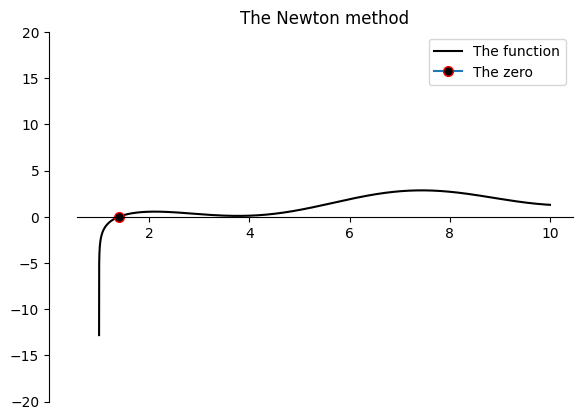

In [47]:
def newton1(x0, tol,f,ff):
    n=0
    print('x_k        f(x_k)     f"'"(x_k)   f(x_k)/f"'"(x_k)')
    while True:
        n+=1
        x1 = x0 - f(x0)/ff(x0)
        print('%.5f    %.5f    %.5f   %.5f'%(x0, f(x0),ff(x0),f(x0)/ff(x0)))
        if abs(x1-x0) < tol:
            break
        x0 = x1
    print('After %i iterations, the solution is %.5f'%(n,x1))
    x = np.linspace(1.000001, 10, 100000)
    y = f(x)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('The Newton method')
    ax.plot(x, y,'k', label = 'The function')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.plot([x1], 0, marker="o", markersize=7, markeredgecolor="r", markerfacecolor="k",label="The zero")
    ax.set_ylim((-20,20))
    ax.legend()
    # remove the ticks from the top and right edges
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
x0 = 1.5
tol = 10e-5
newton1(x0, tol,lambda x:np.log(x-1)+np.cos(x-1), lambda x:1/(x-1)-np.sin(x-1))

### Q3

In [58]:
import sympy as sym
x,y=sym.symbols('x,y')
f1 = x*y+x**2-y**3-1
f2 = x+2*y-x*y**2-2
netn=sym.lambdify((x,y),sym.Matrix([[x],[y]])-sym.Matrix([[f1.diff(x),f1.diff(y)],[f2.diff(x),f2.diff(y)]]).inv()@sym.Matrix([[f1],[f2]]))
x0=0.34
y0=0.5
print("n      x         y")
for n in range(0,21,1):
    s=np.array(netn(x0,y0))
    x0=s[0].item()  
    y0=s[1].item()
    print("%i   %.5f   %.5f "%(n,x0,y0))

n      x         y
0   1.08962   0.61011 
1   0.86896   0.95955 
2   0.98426   0.96823 
3   0.99021   0.98548 
4   0.99515   0.99273 
5   0.99758   0.99637 
6   0.99879   0.99819 
7   0.99940   0.99909 
8   0.99970   0.99955 
9   0.99985   0.99977 
10   0.99992   0.99989 
11   0.99996   0.99994 
12   0.99998   0.99997 
13   0.99999   0.99999 
14   1.00000   0.99999 
15   1.00000   1.00000 
16   1.00000   1.00000 
17   1.00000   1.00000 
18   1.00000   1.00000 
19   1.00000   1.00000 
20   1.00000   1.00000 


## The plots of the two surfaces are included below, as well as the solution line that if given x value, it give you the solution y

#### 3D Plot by Mathematica:

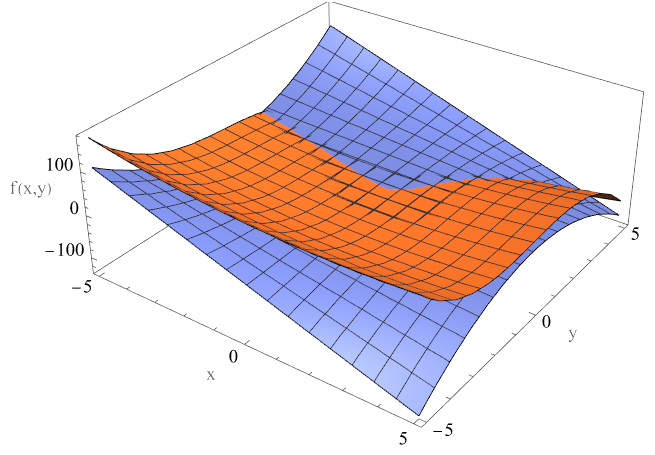

#### Solution Line:

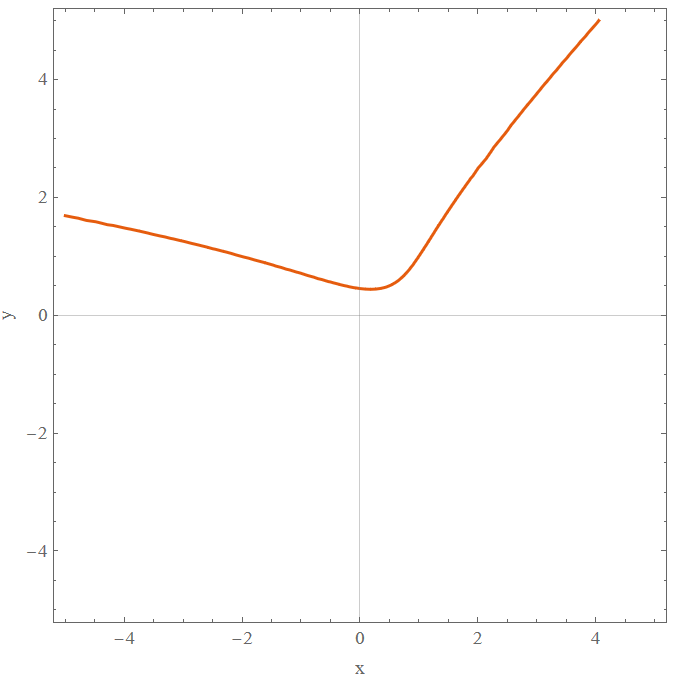